<a href="https://colab.research.google.com/github/carlos-albuquerque/RNA2_Coberturas_Tese_Simone/blob/main/CNN_Conduta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [2]:
import itertools

In [4]:
df = pd.read_csv('tecido_viavel_inviavel_arvore_decisao_correto_5.csv')
df.head()

,Tipo Do Tecido,Característica Do Tecido,Exsudato,Tipo Do Exsudato,Odor,Conduta
0,1,1,2,5,2,6
1,1,1,2,9,1,5
2,2,2,2,8,2,11
3,2,3,2,4,1,15
4,2,3,2,8,2,16


In [6]:
previsores = df.iloc[:, 0:5].values
classes = df.iloc[:,5].values
print(classes)

[ 6  5 11 ... 15 15  5]


In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
classes = labelencoder.fit_transform(classes)
classes_dummy = np_utils.to_categorical(classes)

In [8]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classes_dummy, test_size=0.25)
print(classe_teste)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
classificador = Sequential()
classificador.add(Dense(units = 4, activation = 'relu', input_dim = 5))
classificador.add(Dense(units = 4, activation = 'relu'))
classificador.add(Dense(units = 16, activation = 'softmax'))
classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [10]:
classificador.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 24        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 16)                80        
                                                                 
Total params: 124
Trainable params: 124
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = classificador.fit(previsores_treinamento, classe_treinamento, batch_size = 10, epochs = 50, verbose =1, validation_data=(previsores_teste, classe_teste))

Epoch 1/50
518/518 [==============================] - 7s 7ms/step - loss: 2.5109 - categorical_accuracy: 0.1413 - val_loss: 2.2418 - val_categorical_accuracy: 0.2620
Epoch 2/50
518/518 [==============================] - 2s 4ms/step - loss: 2.1229 - categorical_accuracy: 0.3061 - val_loss: 1.9235 - val_categorical_accuracy: 0.4180
Epoch 3/50
518/518 [==============================] - 2s 4ms/step - loss: 1.8315 - categorical_accuracy: 0.3990 - val_loss: 1.6300 - val_categorical_accuracy: 0.3803
Epoch 4/50
518/518 [==============================] - 2s 4ms/step - loss: 1.5626 - categorical_accuracy: 0.4719 - val_loss: 1.3953 - val_categorical_accuracy: 0.5374
Epoch 5/50
518/518 [==============================] - 2s 4ms/step - loss: 1.3522 - categorical_accuracy: 0.5335 - val_loss: 1.2059 - val_categorical_accuracy: 0.6023
Epoch 6/50
518/518 [==============================] - 2s 4ms/step - loss: 1.1854 - categorical_accuracy: 0.5946 - val_loss: 1.0637 - val_categorical_accuracy: 0.6400
Epoc

In [12]:
resultado = classificador.evaluate(previsores_teste, classe_teste)
previsoes = classificador.predict(previsores_teste)
#print(previsoes)
previsoes = (previsoes > 0.5)
import numpy as np
classe_teste2 = [np.argmax(t) for t in classe_teste]
previsoes2 = [np.argmax(t) for t in previsoes]

54/54 [==============================] - 0s 2ms/step


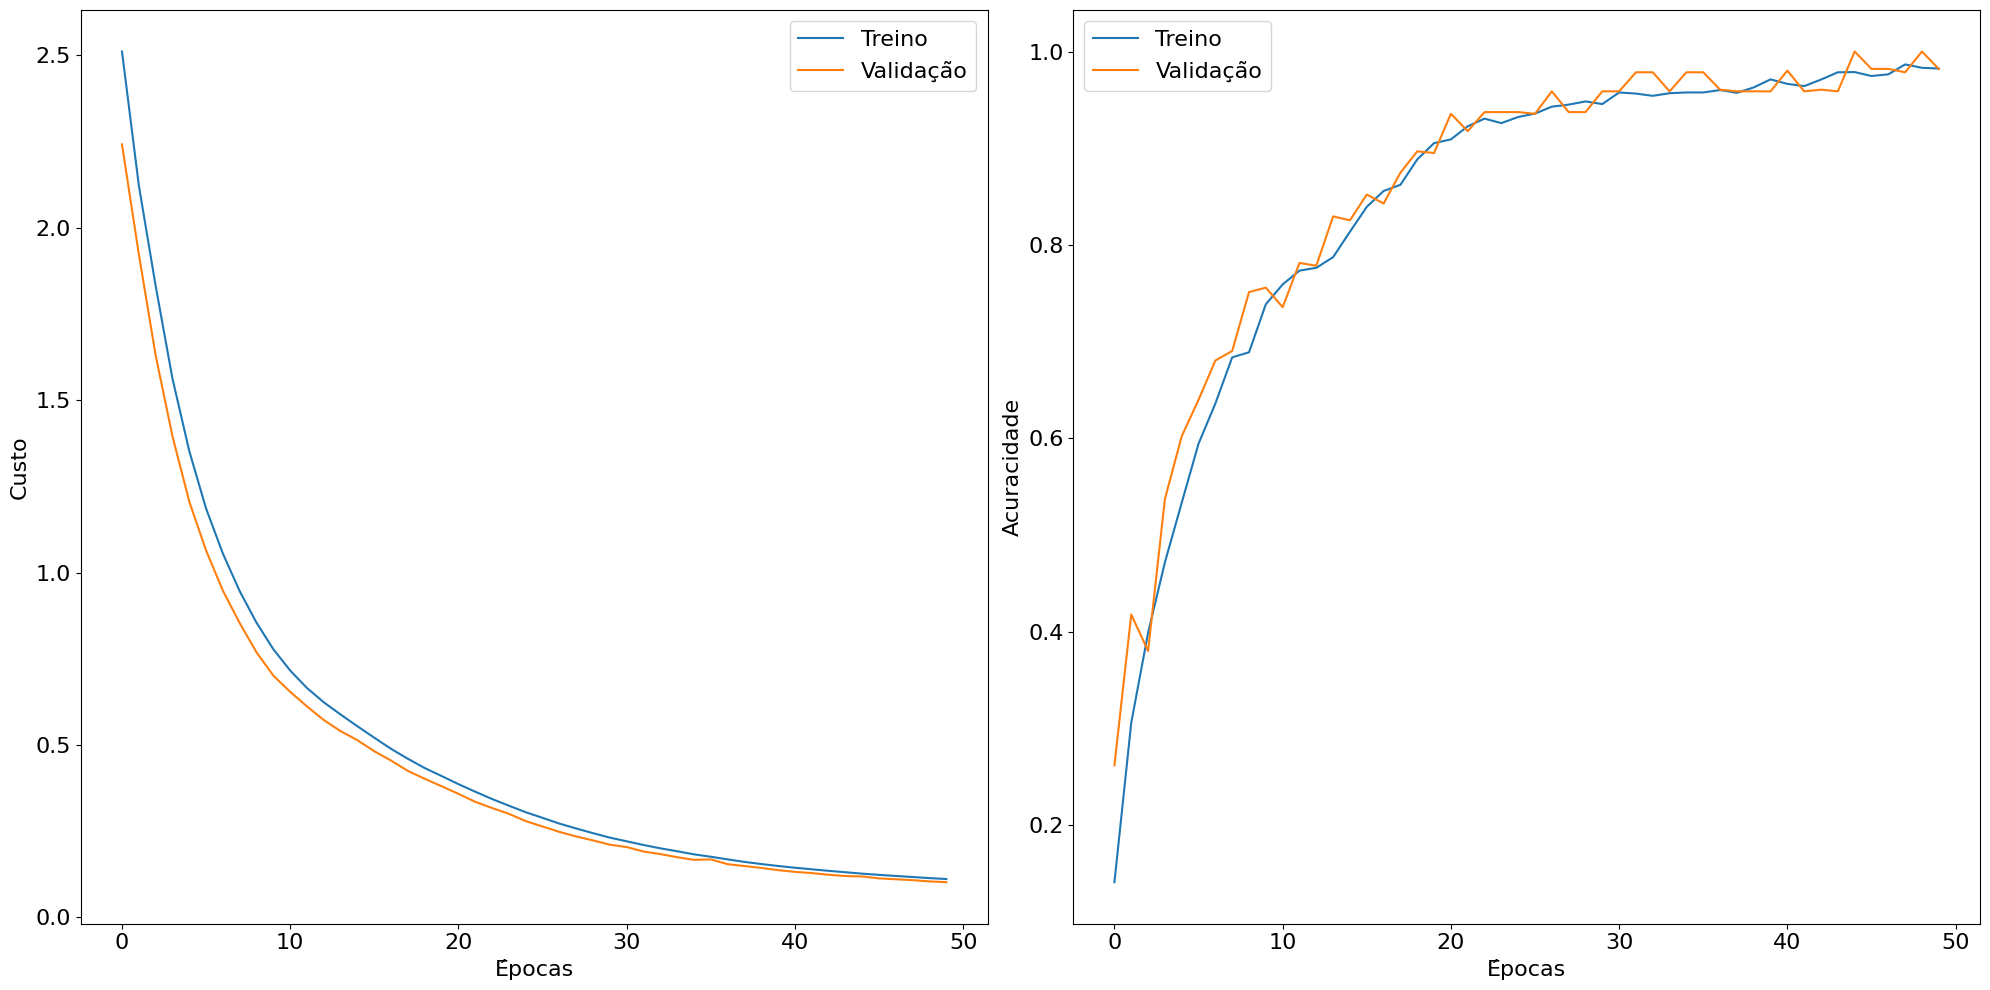

In [13]:
fig = plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'Treino')
plt.plot(history.history['val_loss'], label = 'Validação')
plt.xlabel('Épocas', size = 16)
plt.ylabel('Custo', size = 16)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.legend(prop = {'size': 16})
plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'], label = 'Treino')
plt.plot(history.history['val_categorical_accuracy'], label = 'Validação')
plt.xlabel('Épocas', size = 16)
plt.ylabel('Acuracidade', size = 16)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.legend(prop = {'size': 16})
plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(previsoes2, classe_teste2)
print(cm)

[[ 30   0   0   0   0   0   0   0  37   0   0  31  34  40   0   0]
 [  0  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  34   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  39   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 220   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 246   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  37   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 232   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 228   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 219 

In [15]:
classes = ['tr1', 'tr2', 'tr3', 'tr4', 'tr5','tr6','tr7','tr8','tr9','tr10','tr11','tr12','tr13','tr14','tr15']

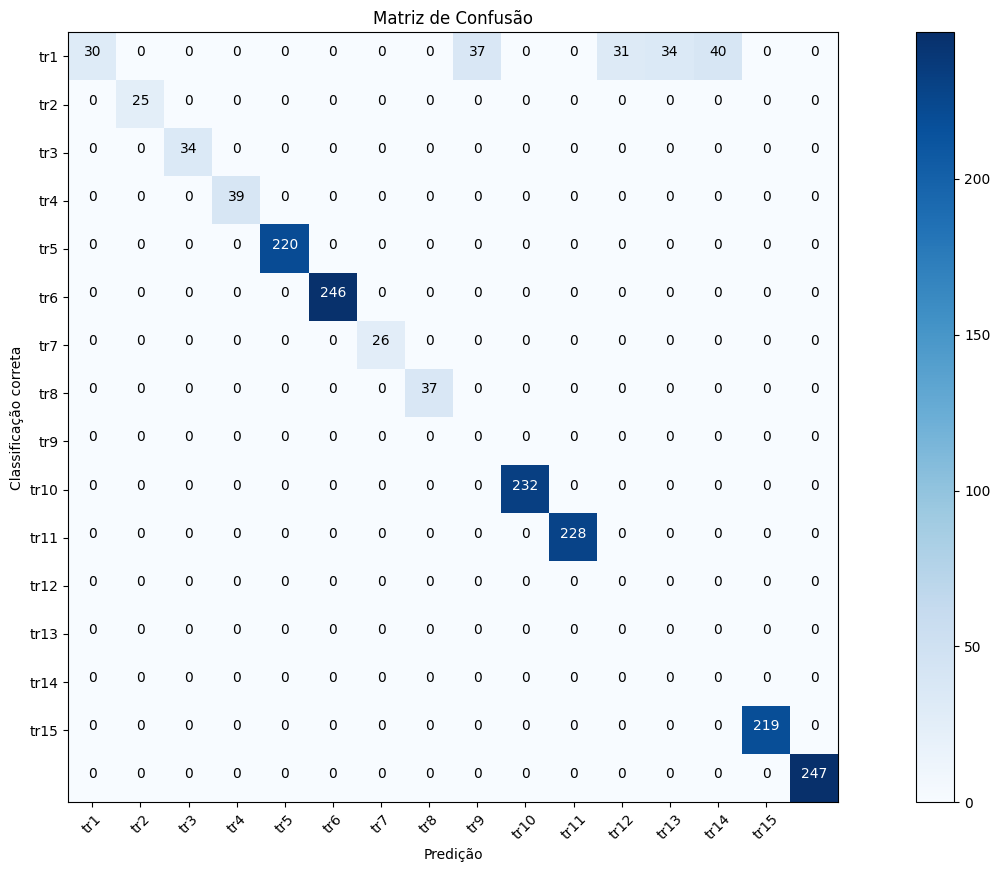

In [16]:
titulo = 'Matriz de Confusão'
fig = plt.figure(figsize = (20,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(titulo)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)
fmt = 'd'
thresh = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center',
           color='white' if cm[i,j] > thresh else 'black')

plt.ylabel('Classificação correta')
plt.xlabel('Predição')
plt.savefig('matriz_confu.png')

In [17]:
model_json = classificador.to_json()
with open('network.json', 'w') as json_file:
  json_file.write(model_json)

In [18]:
from keras.models import save_model
save_model(classificador,'weights.hdf5')

In [19]:
novo_registro = np.array([2,2,1,1,1])
novo_registro = novo_registro.reshape(1, -1)

In [20]:
previsao = classificador.predict(novo_registro)

1/1 [==============================] - 0s 54ms/step


In [21]:
np.argmax(previsao)

6